# Library

In [ ]:
from library import *

2023-03-14 17:10:28.686395: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-14 17:10:28.788359: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-14 17:10:28.792947: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-14 17:10:28.792963: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

# Dataset organization

In [ ]:
dataf0 = get_data_from_questionnaire(0)
dataf1 = get_data_from_questionnaire(1)
dataf2 = get_data_from_questionnaire(2)


In [ ]:
data = pd.concat([dataf0,dataf1,dataf2], ignore_index=True)
data.to_csv("Datasets/data_turing_test.csv", sep=";")

In [ ]:
indexf0={"ans1" : "CR", "ans2" : "3RH", "ans3" : "2RR", "ans4" : "3RR", "ans5" : "CH", "ans6" : "CI", "ans7" : "2RH", "ans8" : "3RH", "ans9" : "3RR", "ans10" : "CI", "ans11" : "2RH", "ans12" : "CR", "ans13" : "2RR", "ans14" : "CH", "ans15" : "2RH", "ans16" : "3RR", "ans17" : "3RH", "ans18" : "CI", "ans19" : "2RR", "ans20" : "CH", "ans21" :"CR", "questionnaire_reference" : "questionnaire_reference"}
indexf1={"ans1" : "CH", "ans2" : "2RR", "ans3" : "2RH", "ans4" : "3RR", "ans5" : "CR", "ans6" : "CI", "ans7" : "3RH", "ans8" : "CH", "ans9" : "3RH", "ans10" : "2RH", "ans11" : "2RR", "ans12" : "CR", "ans13" : "3RR", "ans14" : "CI", "ans15" : "CI", "ans16" : "3RH", "ans17" : "CR", "ans18" : "3RR", "ans19" : "CH", "ans20" : "2RH", "ans21" : "2RR" , "questionnaire_reference" : "questionnaire_reference"}
indexf2={"ans1" : "3RH", "ans2" : "CI", "ans3" : "CH", "ans4" : "CR", "ans5" : "3RR", "ans6" : "2RH", "ans7" : "2RR", "ans8" : "CR", "ans9" : "3RH", "ans10" : "CH", "ans11" : "2RH", "ans12" : "CI", "ans13" : "2RR", "ans14" : "3RR", "ans15" : "3RH", "ans16" : "CI", "ans17" : "3RR", "ans18" : "CR", "ans19" : "2RR", "ans20" : "2RH", "ans21" : "CH", "questionnaire_reference" : "questionnaire_reference"}

In [ ]:
df0_question = index_classification_per_questions(dataf0,indexf0)
df1_question = index_classification_per_questions(dataf1,indexf1)
df2_question = index_classification_per_questions(dataf2,indexf2)


# Data analyze

## Graph for all questions

In [ ]:
df0_labelized = set_label_per_question(df0_question)
df1_labelized = set_label_per_question(df1_question)
df2_labelized = set_label_per_question(df2_question)
data_labelized = pd.concat([df0_labelized,df1_labelized,df2_labelized], ignore_index=True)

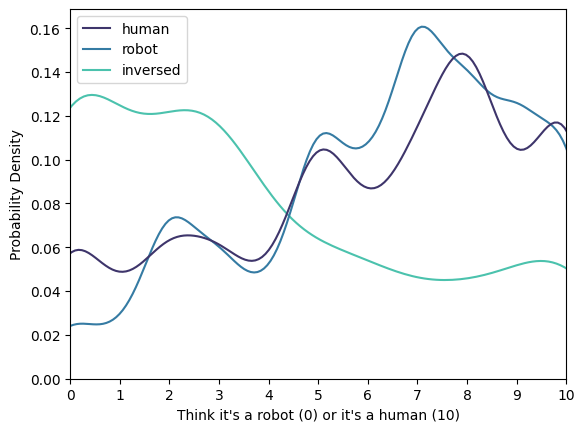

In [ ]:
df = data_labelized.drop("questionnaire_reference", axis=1).astype(int)
sns.kdeplot(data=df, multiple="layer", palette='mako', common_norm=False)
plt.xlabel("Think it's a robot (0) or it's a human (10)")
plt.ylabel("Probability Density")
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10])
plt.xlim(0,10)
plt.savefig("Figures/graph_turing.pdf")
plt.show()

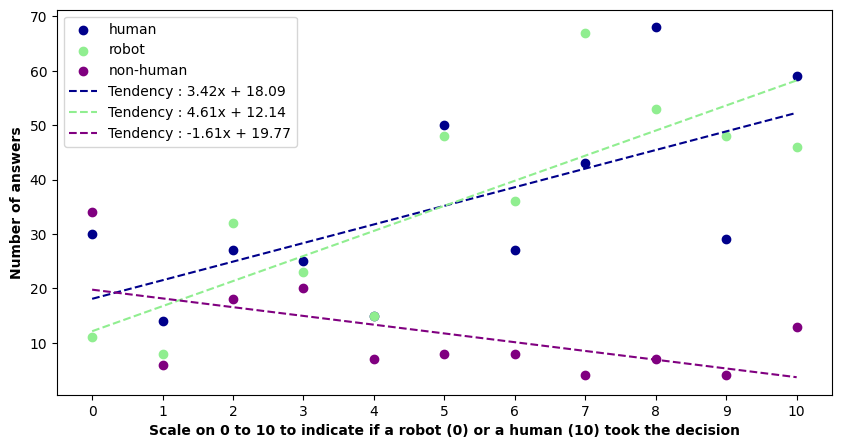

In [ ]:
df_human = pd.concat([df.iloc[:, 0],df.iloc[:, 1],df.iloc[:, 2],df.iloc[:, 3],df.iloc[:, 4],df.iloc[:, 5],df.iloc[:, 6],df.iloc[:, 7],df.iloc[:, 8]],axis = 0)
df_robot = pd.concat([df.iloc[:, 9],df.iloc[:, 10],df.iloc[:, 11],df.iloc[:, 12],df.iloc[:, 13],df.iloc[:, 14],df.iloc[:, 15],df.iloc[:, 16],df.iloc[:, 17]],axis = 0)
df_inversed = pd.concat([df.iloc[:, 18],df.iloc[:, 19],df.iloc[:, 20]],axis = 0)

#set x and y
x = range(11)
y_human = []
for i in range(11):
    y_human.append(df_human[df_human == i].count())
y_robot = []
for i in range(11):
    y_robot.append(df_robot[df_robot == i].count())
y_inversed = []
for i in range(11):
    y_inversed.append(df_inversed[df_inversed == i].count())

#setup graph
plt.figure(figsize=(10,5))
plt.scatter(x,y_human, color= 'darkblue',label='human')
plt.scatter(x,y_robot, color= 'lightgreen',label='robot')
plt.scatter(x,y_inversed, color= 'purple',label='non-human')

slope_h, intercept_h = np.polyfit(x, y_human, 1)
tendance_h = "Tendency : {:.2f}x + {:.2f}".format(slope_h, intercept_h)
plt.plot(x,slope_h*x + intercept_h,"--", color='darkblue',label=tendance_h)

slope_r, intercept_r = np.polyfit(x, y_robot, 1)
tendance_r = "Tendency : {:.2f}x + {:.2f}".format(slope_r, intercept_r)
plt.plot(x,slope_r*x + intercept_r,"--", color='lightgreen',label=tendance_r)

slope_i, intercept_i = np.polyfit(x, y_inversed, 1)
tendance_i = "Tendency : {:.2f}x + {:.2f}".format(slope_i, intercept_i)
plt.plot(x,slope_i*x + intercept_i,"--", color='purple',label=tendance_i)
ax = plt.gca()

plt.ylabel("Number of answers", fontweight='bold')
plt.xlabel('Scale on 0 to 10 to indicate if a robot (0) or a human (10) took the decision', fontweight='bold')
plt.xticks(range(11))
# ajout du texte de la tendance de la courbe
plt.legend()
plt.savefig("Figures/plot_turing.pdf")
plt.show()

### Koglomorov-test

In [ ]:
# collecting curves
lines = ax.get_lines()
y_val = {}

y_val['human'] = lines[0].get_ydata()
y_val['robot'] = lines[1].get_ydata()
y_val['inversed'] = lines[2].get_ydata()

print("Test de Koglomorov entre les décisions humaines et humaines inversées")
koglomorov_test(y_val['human'], y_val['inversed'])
print("\nTest de Koglomorov entre les décisions artiicielles et humaines inversées")
koglomorov_test(y_val['robot'], y_val['inversed'])
print("\nTest de Koglomorov entre les décisions artiicielles et humaines")
koglomorov_test(y_val['robot'], y_val['human'])

Test de Koglomorov entre les décisions humaines et humaines inversées
Statistique de Koglomorov-Smirnov : 0.90909
P-valeur : 0.0000623731
Il y a une différence significative entre les deux courbes.

Test de Koglomorov entre les décisions artiicielles et humaines inversées
Statistique de Koglomorov-Smirnov : 0.81818
P-valeur : 0.0006549178
Il y a une différence significative entre les deux courbes.

Test de Koglomorov entre les décisions artiicielles et humaines
Statistique de Koglomorov-Smirnov : 0.18182
P-valeur : 0.9970968144
Il n'y a pas de différence significative entre les deux courbes.


## Graph for consecutive questions 

In [ ]:
df0_labelized = set_label_per_question(df0_question[['CH','CR','CI']],)
df1_labelized = set_label_per_question(df1_question[['CH','CR','CI']])
df2_labelized = set_label_per_question(df2_question[['CH','CR','CI']])
data_labelized = pd.concat([df0_labelized,df1_labelized,df2_labelized], ignore_index=True)

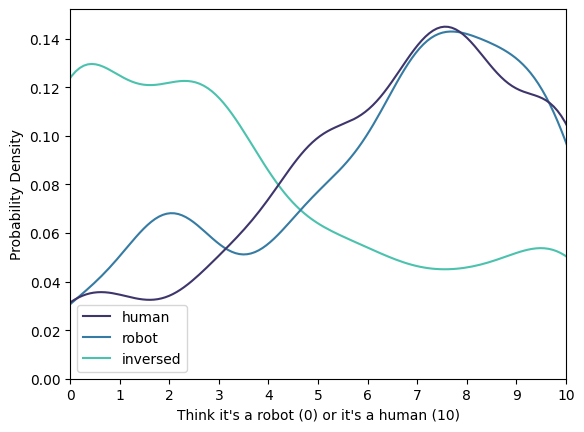

In [ ]:
df = data_labelized.astype(int)
sns.kdeplot(data=df, multiple="layer", palette='mako', common_norm=False)
ax = plt.gca()
plt.xlabel("Think it's a robot (0) or it's a human (10)")
plt.ylabel("Probability Density")
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10])
plt.xlim(0,10)
plt.savefig("Figures/graph_turing_consecutive.pdf")
plt.show()

### Koglomorov-test

In [ ]:
# collecting curves
lines = ax.get_lines()
y_val = {}

y_val['inversed'] = lines[0].get_ydata()
y_val['robot'] = lines[1].get_ydata()
y_val['human'] = lines[2].get_ydata()

print("Test de Koglomorov entre les décisions humaines et humaines inversées")
koglomorov_test(y_val['human'], y_val['inversed'])
print("\nTest de Koglomorov entre les décisions artiicielles et humaines inversées")
koglomorov_test(y_val['robot'], y_val['inversed'])

Test de Koglomorov entre les décisions humaines et humaines inversées
Statistique de Koglomorov-Smirnov : 0.18000
P-valeur : 0.0030098471
Il y a une différence significative entre les deux courbes.

Test de Koglomorov entre les décisions artiicielles et humaines inversées
Statistique de Koglomorov-Smirnov : 0.15000
P-valeur : 0.0220923622
Il y a une différence significative entre les deux courbes.


## Graph for consecutive questions between only human and robots

In [ ]:
df0_labelized = set_label_per_question(df0_question[['CH','CR']],)
df1_labelized = set_label_per_question(df1_question[['CH','CR']])
df2_labelized = set_label_per_question(df2_question[['CH','CR']])
data_labelized = pd.concat([df0_labelized,df1_labelized,df2_labelized], ignore_index=True)

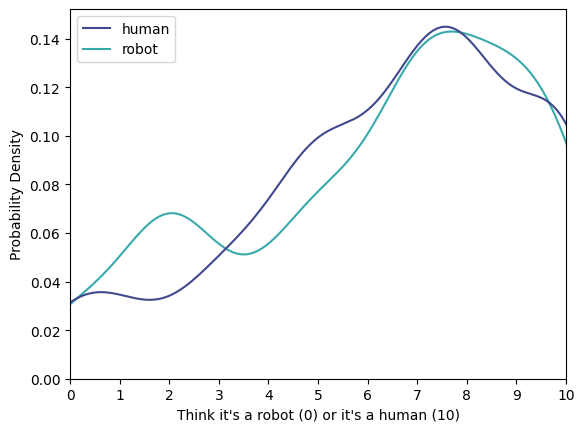

In [ ]:
df = data_labelized.astype(int)
sns.kdeplot(data=df, multiple="layer", palette='mako', common_norm=False)

plt.xlabel("Think it's a robot (0) or it's a human (10)")
plt.ylabel("Probability Density")
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10])
plt.xlim(0,10)
plt.savefig("Figures/graph_turing_consecutiveHR.pdf")
plt.show()

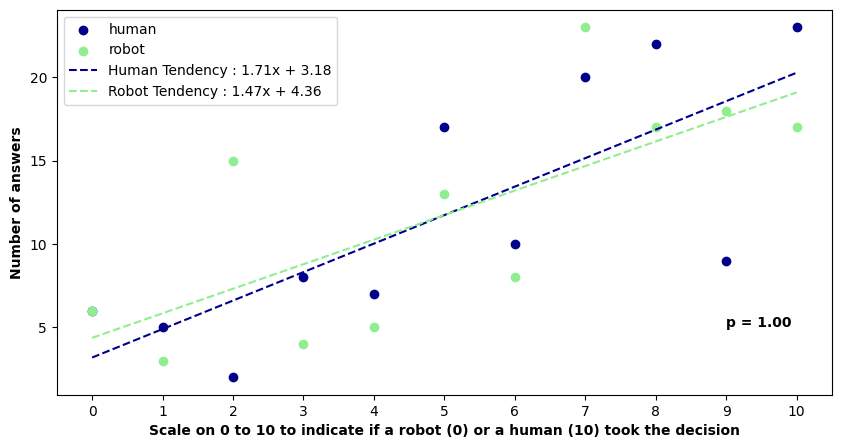

In [ ]:
df_human = pd.concat([df.iloc[:, 0],df.iloc[:, 1],df.iloc[:, 2]],axis = 0)
df_robot = pd.concat([df.iloc[:, 3],df.iloc[:, 4],df.iloc[:, 5]],axis = 0)

#set x and y
x = range(11)
y_human = []
for i in range(11):
    y_human.append(df_human[df_human == i].count())
y_robot = []
for i in range(11):
    y_robot.append(df_robot[df_robot == i].count())

#setup graph
plt.figure(figsize=(10,5))
plt.scatter(x,y_human, color= 'darkblue',label='human')
plt.scatter(x,y_robot, color= 'lightgreen',label='robot')

slope_h, intercept_h = np.polyfit(x, y_human, 1)
tendance_h = "Human Tendency : {:.2f}x + {:.2f}".format(slope_h, intercept_h)
plt.plot(x,slope_h*x + intercept_h,"--", color='darkblue',label=tendance_h)

slope_r, intercept_r = np.polyfit(x, y_robot, 1)
tendance_r = "Robot Tendency : {:.2f}x + {:.2f}".format(slope_r, intercept_r)
plt.plot(x,slope_r*x + intercept_r,"--", color='lightgreen',label=tendance_r)

ax = plt.gca()
plt.ylabel("Number of answers", fontweight='bold')
plt.xlabel('Scale on 0 to 10 to indicate if a robot (0) or a human (10) took the decision', fontweight='bold')
plt.xticks(range(11))
plt.text(9,5, "p = 1.00", fontweight='bold')
# ajout du texte de la tendance de la courbe
plt.legend()
plt.savefig("Figures/plot_turing_cons.pdf")
plt.show()

### Koglomorov-test

In [ ]:
# collecting curves
lines = ax.get_lines()
y_val = {}

y_val['human'] = lines[0].get_ydata()
y_val['robot'] = lines[1].get_ydata()

print("Test de Koglomorov entre les décisions humaines et artificielles")
koglomorov_test(y_val['human'], y_val['robot'])

Test de Koglomorov entre les décisions humaines et artificielles
Statistique de Koglomorov-Smirnov : 0.09091
P-valeur : 1.0000000000
Il n'y a pas de différence significative entre les deux courbes.


## Graph for repetitions questions between only human and robots

In [ ]:
df0_labelized = set_label_per_question(df0_question[['2RH','2RR','3RR','3RH']])
df1_labelized = set_label_per_question(df1_question[['2RH','2RR','3RR','3RH']])
df2_labelized = set_label_per_question(df2_question[['2RH','2RR','3RR','3RH']])
data_labelized = pd.concat([df0_labelized,df1_labelized,df2_labelized], ignore_index=True)

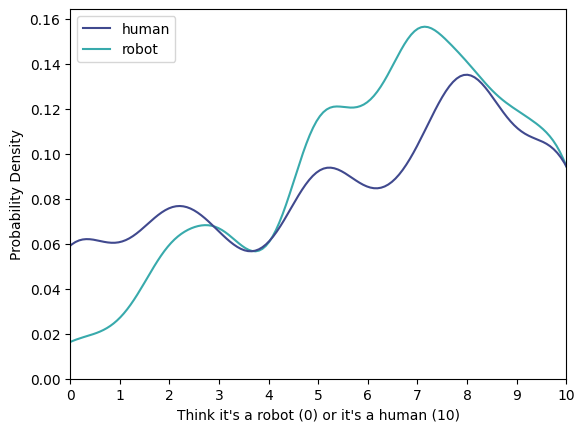

In [ ]:
df = data_labelized.astype(int)
sns.kdeplot(data=df, multiple="layer", palette='mako', common_norm=False)
plt.xlabel("Think it's a robot (0) or it's a human (10)")
plt.ylabel("Probability Density")
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10])
plt.xlim(0,10)
plt.savefig("Figures/graph_turing_repetitionHR.pdf")
plt.show()

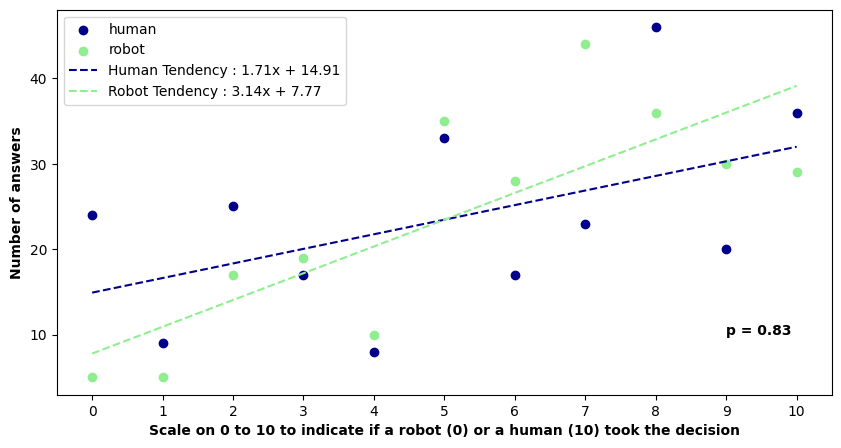

In [ ]:
df_human = pd.concat([df.iloc[:, 0],df.iloc[:, 1],df.iloc[:, 2],df.iloc[:, 9],df.iloc[:, 10],df.iloc[:, 11]],axis = 0)
df_robot = pd.concat([df.iloc[:, 3],df.iloc[:, 4],df.iloc[:, 5],df.iloc[:, 6],df.iloc[:, 7],df.iloc[:, 8]],axis = 0)

#set x and y
x = range(11)
y_human = []
for i in range(11):
    y_human.append(df_human[df_human == i].count())
y_robot = []
for i in range(11):
    y_robot.append(df_robot[df_robot == i].count())

#setup graph
plt.figure(figsize=(10,5))
plt.scatter(x,y_human, color= 'darkblue',label='human')
plt.scatter(x,y_robot, color= 'lightgreen',label='robot')

slope_h, intercept_h = np.polyfit(x, y_human, 1)
tendance_h = "Human Tendency : {:.2f}x + {:.2f}".format(slope_h, intercept_h)
plt.plot(x,slope_h*x + intercept_h,"--", color='darkblue',label=tendance_h)

slope_r, intercept_r = np.polyfit(x, y_robot, 1)
tendance_r = "Robot Tendency : {:.2f}x + {:.2f}".format(slope_r, intercept_r)
plt.plot(x,slope_r*x + intercept_r,"--", color='lightgreen',label=tendance_r)

ax = plt.gca()
plt.ylabel("Number of answers", fontweight='bold')
plt.xlabel('Scale on 0 to 10 to indicate if a robot (0) or a human (10) took the decision', fontweight='bold')
plt.xticks(range(11))
plt.text(9,10, "p = 0.83", fontweight='bold')

# ajout du texte de la tendance de la courbe
plt.legend()
plt.savefig("Figures/plot_turing_rep.pdf")
plt.show()

### Koglomorov-test

In [ ]:
# collecting curves
lines = ax.get_lines()
y_val = {}

y_val['human'] = lines[0].get_ydata()
y_val['robot'] = lines[1].get_ydata()

print("Test de Koglomorov entre les décisions humaines et artificielles")
koglomorov_test(y_val['human'], y_val['robot'])

Test de Koglomorov entre les décisions humaines et artificielles
Statistique de Koglomorov-Smirnov : 0.27273
P-valeur : 0.8325876909
Il n'y a pas de différence significative entre les deux courbes.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=df420847-9b7d-4085-bb2b-2d13083511fa' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>